# import libs


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# process Yelp


In [ ]:
import json
import pandas as pd

def loadYelp(path):
  data_file = open(path)
  data = []
  for line in data_file:
    data.append(json.loads(line))
  dataset = pd.DataFrame(data)
  data_file.close()
  return dataset


## process business


In [ ]:
Yelp_path = '/content/drive/MyDrive/Colab_Notebooks/5500/raw_dataset/yelp_academic_dataset_business.json'
business_dataset = loadYelp(Yelp_path)


In [ ]:
business_dataset.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
business_dataset.info()

zero_count = (business_dataset['is_open'] == 0).sum()

print("Number of zeros in the 'is_open' column:", zero_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB
Number of zeros in the 'is_open' column: 30648


In [ ]:

attrs = pd.json_normalize(business_dataset['attributes'])
attributes_values = attrs.to_dict(orient='records')
distinct_values = {}


for item in attributes_values:
    for key, value in item.items():
        if key not in distinct_values:
            distinct_values[key] = set()
        distinct_values[key].add(value)


for key, values in distinct_values.items():
    print(f"Distinct values for '{key}': {values}")

Distinct values for 'ByAppointmentOnly': {nan, 'True', 'None', 'False'}
Distinct values for 'BusinessAcceptsCreditCards': {nan, 'True', 'None', 'False'}
Distinct values for 'BikeParking': {nan, 'True', 'None', 'False'}
Distinct values for 'RestaurantsPriceRange2': {nan, 'None', '4', '2', '3', '1'}
Distinct values for 'CoatCheck': {nan, 'True', 'None', 'False'}
Distinct values for 'RestaurantsTakeOut': {nan, 'True', 'None', 'False'}
Distinct values for 'RestaurantsDelivery': {nan, 'True', 'None', 'False'}
Distinct values for 'Caters': {nan, 'True', 'None', 'False'}
Distinct values for 'WiFi': {nan, "'paid'", 'None', "'no'", "'free'", "u'free'", "u'no'", "u'paid'"}
Distinct values for 'BusinessParking': {"{'garage': True, 'street': True, 'validated': False, 'lot': True, 'valet': True}", "{'garage': True, 'street': False, 'validated': False, 'lot': True, 'valet': False}", "{u'valet': False, u'garage': True, u'street': False, u'lot': None, u'validated': None}", "{'garage': True, 'street': 

In [ ]:
print(len(distinct_values))

In [ ]:
from collections import Counter
# Assuming you have already read your JSON data into a DataFrame df

# Step 1: Ensure 'categories' column is properly parsed
# For example, if it's a list of lists, you can flatten it like this:
# categories_flat = [category for sublist in business_dataset['categories'] if sublist is not None for category in sublist]
categories_flat = [category.strip() for sublist in business_dataset['categories']  if pd.notnull(sublist) for category in sublist.split(',')]

# Step 2: Count the occurrences of each category
category_counts = Counter(categories_flat)

# Step 3: Print the count of unique categories
print("Number of different types of categories:", len(category_counts))
print("Unique categories and their counts:")
total_cnt = 0
for category, count in category_counts.items():
    print(f"{category}: {count}")
    total_cnt += count
print(total_cnt)

39
Number of different types of categories: 1311
Unique categories and their counts:
Doctors: 3763
Traditional Chinese Medicine: 174
Naturopathic/Holistic: 221
Acupuncture: 424
Health & Medical: 11890
Nutritionists: 439
Shipping Centers: 792
Local Services: 11198
Notaries: 516
Mailbox Centers: 339
Printing Services: 790
Department Stores: 1430
Shopping: 24395
Fashion: 5739
Home & Garden: 5799
Electronics: 1422
Furniture Stores: 1597
Restaurants: 52268
Food: 27781
Bubble Tea: 477
Coffee & Tea: 6703
Bakeries: 3150
Brewpubs: 186
Breweries: 863
Burgers: 5636
Fast Food: 6472
Sandwiches: 8366
Ice Cream & Frozen Yogurt: 2657
Sporting Goods: 1662
Shoe Stores: 1018
Sports Wear: 574
Accessories: 1639
Synagogues: 12
Religious Organizations: 286
Pubs: 1821
Italian: 4573
Bars: 11065
American (Traditional): 8139
Nightlife: 12281
Greek: 779
Vietnamese: 852
Food Trucks: 1273
Diners: 1494
Breakfast & Brunch: 6239
General Dentistry: 1993
Dentists: 2528
Cosmetic Dentists: 1630
Delis: 2393
Sushi Bars: 171

# process TouristAttraction

## loading data



In [ ]:
toursist_path = "/content/drive/MyDrive/Colab_Notebooks/5500/raw_dataset/OpenStreetMap_Tourist_Attractions_for_North_America.csv"
touristAttractionDataset = pd.read_csv(toursist_path)

<ipython-input-117-34a1a65e1dbb>:1: DtypeWarning: Columns (4,7,10,15,18,23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  touristAttractionDataset = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/5500/raw_dataset/OpenStreetMap_Tourist_Attractions_for_North_America.csv")


In [ ]:
touristAttractionDataset.head(5)

,X,Y,OBJECTID,addr_city,addr_country,addr_housenumber,addr_postcode,addr_province,addr_state,addr_street,...,ref,source_transform,tourism,website,wheelchair,winter_road,wires,wood,zoo,osm_id2
0,-92.318096,14.616769,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,viewpoint,NaN,NaN,NaN,NaN,NaN,NaN,5327709923
1,-92.355947,14.653835,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,hotel,NaN,NaN,NaN,NaN,NaN,NaN,388651468
2,-92.240303,14.745767,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,camp_site,NaN,NaN,NaN,NaN,NaN,NaN,7883004685
3,-92.433990,14.732903,611,NaN,NaN,NaN,30800,NaN,NaN,Villa del Sol,...,NaN,NaN,camp_site,https://www.misionsurfmexico.com/,NaN,NaN,NaN,NaN,NaN,7228473785
4,-92.284821,14.865885,958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,motel,NaN,NaN,NaN,NaN,NaN,NaN,4794499945


In [ ]:
touristAttractionDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265361 entries, 0 to 265360
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 265361 non-null  float64
 1   Y                 265361 non-null  float64
 2   OBJECTID          265361 non-null  int64  
 3   addr_city         14503 non-null   object 
 4   addr_country      987 non-null     object 
 5   addr_housenumber  17707 non-null   object 
 6   addr_postcode     13999 non-null   object 
 7   addr_province     678 non-null     object 
 8   addr_state        10812 non-null   object 
 9   addr_street       18755 non-null   object 
 10  addr_unit         1307 non-null    object 
 11  amenity           2027 non-null    object 
 12  attraction        1554 non-null    object 
 13  bicycle           783 non-null     object 
 14  board_type        12772 non-null   object 
 15  building          419 non-null     object 
 16  building_levels   47

In [ ]:
cleaned_tourist = touristAttractionDataset.drop(columns=['winter_road','wires','wood','zoo', ])

In [ ]:
cleaned_tourist.head()

,X,Y,OBJECTID,addr_city,addr_country,addr_housenumber,addr_postcode,addr_province,addr_state,addr_street,...,name_es,opening_hours,operator,phone,ref,source_transform,tourism,website,wheelchair,osm_id2
0,-92.318096,14.616769,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,viewpoint,NaN,NaN,5327709923
1,-92.355947,14.653835,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Private,NaN,NaN,NaN,hotel,NaN,NaN,388651468
2,-92.240303,14.745767,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,camp_site,NaN,NaN,7883004685
3,-92.433990,14.732903,611,NaN,NaN,NaN,30800,NaN,NaN,Villa del Sol,...,NaN,24/7,Mision Mexico | www.lovelifehope.com,+5219626301470,NaN,NaN,camp_site,https://www.misionsurfmexico.com/,NaN,7228473785
4,-92.284821,14.865885,958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,motel,NaN,NaN,4794499945


## basis analysis of nested columns

## auto fill the address info and location name(time-consuming)

### set-up libs


In [ ]:
!pip install geopy

In [ ]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00


In [ ]:
pip install geopandas

### running geo

In [ ]:
from geopy.geocoders import Nominatim, GeoNames
from faker import Faker
import logging
from tqdm import tqdm
from joblib import Parallel, delayed
import multiprocessing
import os
import time
from geopy.exc import GeocoderUnavailable
os.environ["USE_PYGEOS"] = "0"
import geopandas
import random
import string
# geolocator = Nominatim(user_agent="app3")
# geolocator = GeoNames(username='jonezzz')
# location = geolocator.geocode("175 5th Avenue NYC")

In [ ]:
logging.getLogger("urllib3").setLevel(logging.ERROR)
faker = Faker()
def create_geolocator(user_agent):
    return Nominatim(user_agent=user_agent)

def generate_random_string(length=10):
    """Generate a random string of specified length."""
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for _ in range(length))
geolocator = create_geolocator('app1')

def get_addr(X, Y , geolocator,max_retries=3, base_delay=1):
    retries = 0
    delay = base_delay
    while retries < max_retries:
        try:
            # Attempt to reverse geocode coordinates
            location = geolocator.reverse(f'{Y}, {X}', addressdetails=True, exactly_one=True)
            return location, geolocator
        except GeocoderUnavailable:
            # Geocoder is unavailable, retry with a new user agent
            print("Geocoder is unavailable. Retrying with a new user agent...")
            time.sleep(delay)
            delay *= 2  # Exponential backoff
            retries += 1
            new_user_agent = generate_random_string()
            geolocator = create_geolocator(new_user_agent)
        except Exception as e:
            # Other unexpected errors
            print("An error occurred:", e)
            break

    print("Max retries exceeded. Unable to get address.")
    return None, geolocator


location = get_addr(-92.318096, 14.616769, geolocator)

location[0].raw

{'place_id': 299802816,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 5327709923,
 'lat': '14.616769',
 'lon': '-92.3180957',
 'class': 'tourism',
 'type': 'viewpoint',
 'place_rank': 30,
 'importance': 9.99999999995449e-06,
 'addresstype': 'tourism',
 'name': 'Brisas del Mar',
 'display_name': 'Brisas del Mar, Entrada Jaritas-Ciudad Hidalgo, Benito Juárez (Cosalapa), Suchiate, Chiapas, México',
 'address': {'tourism': 'Brisas del Mar',
  'road': 'Entrada Jaritas-Ciudad Hidalgo',
  'village': 'Benito Juárez (Cosalapa)',
  'county': 'Suchiate',
  'state': 'Chiapas',
  'ISO3166-2-lvl4': 'MX-CHP',
  'country': 'México',
  'country_code': 'mx'},
 'boundingbox': ['14.6167190', '14.6168190', '-92.3181457', '-92.3180457']}

In [ ]:

def process_row(row, geolocator):

    X = row['X']
    Y = row['Y']

    # narrow down to USA (not including minor islands)
    if (-124.67 < X < -66.95) and (49.38 > Y > 25.84):
        # geolocator = create_geolocator('app1')
        location, _ = get_addr(X, Y, geolocator)
        # print(location.raw.get('address', {}).get('country', ''))

        if location and location.raw.get('address', {}).get('country_code', '') == 'us':
            return {
                'X': X,
                'Y': Y,
                'map_name': location.raw.get('name', ''),
                'ma_display_name': location.raw.get('display_name', ''),
                'map_city': location.raw.get('address', {}).get('city', ''),
                'map_country': location.raw.get('address', {}).get('country', ''),
                'map_ppostalCode': location.raw.get('address', {}).get('postcode', ''),
                'map_state': location.raw.get('address', {}).get('state', ''),
                'map_street': location.raw.get('address', {}).get('road', ''),
            }
    return None

def processBatch(batch_data):
  filtered_addresses = []
  new_user = generate_random_string()
  print(new_user)
  geolocator =  create_geolocator(new_user)
  for index, row in tqdm(batch_data.iterrows()):
    addr = process_row(row,geolocator)
    filtered_addresses.append(addr)
  new_list = list(filter(lambda x: x is not None, filtered_addresses))
  return new_list


# num_cores = multiprocessing.cpu_count()
# print(num_cores)
# results = Parallel(n_jobs=num_cores)(
#     delayed(process_row)(row) for _, row in tqdm(cleaned_tourist.iterrows())
# )
# Convert the list of dictionaries to a DataFrame



In [ ]:
tourist_with_name = cleaned_tourist.dropna(subset=['name']).reset_index(drop=True)
tourist_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126472 entries, 0 to 126471
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   X                 126472 non-null  float64
 1   Y                 126472 non-null  float64
 2   OBJECTID          126472 non-null  int64  
 3   addr_city         13782 non-null   object 
 4   addr_country      954 non-null     object 
 5   addr_housenumber  16382 non-null   object 
 6   addr_postcode     13348 non-null   object 
 7   addr_province     647 non-null     object 
 8   addr_state        10407 non-null   object 
 9   addr_street       17611 non-null   object 
 10  addr_unit         429 non-null     object 
 11  amenity           854 non-null     object 
 12  attraction        1486 non-null    object 
 13  bicycle           316 non-null     object 
 14  board_type        6672 non-null    object 
 15  building          343 non-null     object 
 16  building_levels   44

In [ ]:
# break into batch
chunk_size = 5000
num_chunks = (len(tourist_with_name) // chunk_size) + 1

In [ ]:
folder_path = '/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/temp_data'
start = num_chunks
for i in tqdm(range(start,0,-1)):
  batch = tourist_with_name.iloc[i*chunk_size:(i+1)*chunk_size]
  result = processBatch(batch)
  print(len(result))
  us_tourist_addr = pd.DataFrame(result)
  us_tourist_addr.to_csv(os.path.join(folder_path, f'batch_{i+1}.csv'), index=False)
  print("saving to" , os.path.join(folder_path, f'batch_{i+1}.csv'))


In [ ]:
folder_path = '/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/temp_data'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv') and file.startswith('batch_')]


dfs = []

for file in tqdm(csv_files):
  try:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)
  except Exception as e:
    print(f"Error occurred while loading file {file}: {e}")

# Concatenate all DataFrames into one
us_tourist_addr= pd.concat(dfs, ignore_index=True)

 46%|████▌     | 12/26 [00:00<00:00, 29.66it/s]

Error occurred while loading file batch_19.csv: No columns to parse from file


100%|██████████| 26/26 [00:00<00:00, 29.04it/s]


In [ ]:
us_tourist_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91876 entries, 0 to 91875
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                91876 non-null  float64
 1   Y                91876 non-null  float64
 2   map_name         87517 non-null  object 
 3   ma_display_name  91876 non-null  object 
 4   map_city         28026 non-null  object 
 5   map_country      91876 non-null  object 
 6   map_ppostalCode  67653 non-null  object 
 7   map_state        91876 non-null  object 
 8   map_street       91389 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.3+ MB


## merge geo addr to tourism info

In [ ]:
merged_df = pd.merge(tourist_with_name, us_tourist_addr, on=['X', 'Y'], how='inner')

In [ ]:
merged_df = merged_df.drop_duplicates(subset=["OBJECTID"])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91876 entries, 0 to 92021
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 91876 non-null  float64
 1   Y                 91876 non-null  float64
 2   OBJECTID          91876 non-null  int64  
 3   addr_city         9378 non-null   object 
 4   addr_country      476 non-null    object 
 5   addr_housenumber  10556 non-null  object 
 6   addr_postcode     9296 non-null   object 
 7   addr_province     1 non-null      object 
 8   addr_state        9861 non-null   object 
 9   addr_street       10768 non-null  object 
 10  addr_unit         361 non-null    object 
 11  amenity           569 non-null    object 
 12  attraction        1143 non-null   object 
 13  bicycle           253 non-null    object 
 14  board_type        5440 non-null   object 
 15  building          220 non-null    object 
 16  building_levels   26 non-null     float64
 17

## analysis data


In [ ]:
def analysisCol(df, name):
  ans = df[name].value_counts()
  print(len(ans))
  return  ans
def display(df):
  return pd.DataFrame(df.items(), columns=['Category', 'Count'])


In [ ]:
display(analysisCol(merged_df, 'historic'))
# merged_df['attraction'].dropna()

79


,Category,Count
0,memorial,252
1,yes,198
2,archaeological_site,100
3,aircraft,94
4,monument,68
...,...,...
74,mine_shaft,1
75,railway_station,1
76,technical_monument,1
77,mill,1


## break down table

In [ ]:
map_cols = ['map_name', 'ma_display_name', 'map_city', 'map_country',
            'map_ppostalCode', 'map_state', 'map_street']
address_cols = ['addr_city', 'addr_country', 'addr_housenumber', 'addr_postcode',
                'addr_province', 'addr_state', 'addr_street', 'addr_unit']
select_cols = ['OBJECTID','X','Y','name'] + map_cols + address_cols
tourist_addr = merged_df[select_cols]

In [ ]:
tourist_addr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91876 entries, 0 to 92021
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          91876 non-null  int64  
 1   X                 91876 non-null  float64
 2   Y                 91876 non-null  float64
 3   name              91876 non-null  object 
 4   map_name          87517 non-null  object 
 5   ma_display_name   91876 non-null  object 
 6   map_city          28026 non-null  object 
 7   map_country       91876 non-null  object 
 8   map_ppostalCode   67653 non-null  object 
 9   map_state         91876 non-null  object 
 10  map_street        91389 non-null  object 
 11  addr_city         9378 non-null   object 
 12  addr_country      476 non-null    object 
 13  addr_housenumber  10556 non-null  object 
 14  addr_postcode     9296 non-null   object 
 15  addr_province     1 non-null      object 
 16  addr_state        9861 non-null   object 
 17

In [ ]:
copy_tourist_addr = tourist_addr.copy(deep=True)

fill up empty city in  addr city with map_city.

In [158]:
def modify_postcode(postcode):
    if pd.isna(postcode):  # Check if it's NaN
        return postcode  # Return NaN as is
    postcode_str = str(postcode)  # Convert to string
    # Check if the postcode matches the pattern 'xxxxx-xxx'
    if len(postcode) == 10 and postcode[5] == '-':
        # Keep only the first 5 characters
        return postcode[:5]
    else:
        return postcode

In [159]:
tourist_addr = copy_tourist_addr
tourist_addr['city']  = tourist_addr['addr_city'].fillna(tourist_addr['map_city']).str.strip().str.capitalize()
tourist_addr['country'] = tourist_addr['map_country'].str.strip().str.capitalize()
tourist_addr['postcode']  = tourist_addr['addr_postcode'].fillna(tourist_addr['map_ppostalCode']).str.strip().str.capitalize()
tourist_addr['postcode'] = tourist_addr['postcode'].apply(modify_postcode)
tourist_addr['state'] = tourist_addr['map_state'].str.strip().str.capitalize()
tourist_addr['street'] =  tourist_addr['addr_street'].fillna(tourist_addr['map_street']).str.strip().str.capitalize()
tourist_addr['unit'] = tourist_addr['addr_unit'].str.strip().str.capitalize()
tourist_addr['display_name'] = tourist_addr['ma_display_name'].str.strip().str.capitalize()



select_cols = ['OBJECTID', 'X', 'Y', 'name', 'city', 'country', 'postcode', 'state', 'street', 'unit', 'display_name']


cleaned_tourist_addr = tourist_addr[select_cols].reset_index(drop=True)

In [160]:
cleaned_tourist_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91876 entries, 0 to 91875
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      91876 non-null  int64  
 1   X             91876 non-null  float64
 2   Y             91876 non-null  float64
 3   name          91876 non-null  object 
 4   city          33672 non-null  object 
 5   country       91876 non-null  object 
 6   postcode      27673 non-null  object 
 7   state         91876 non-null  object 
 8   street        91403 non-null  object 
 9   unit          361 non-null    object 
 10  display_name  91876 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.7+ MB


In [161]:
cleaned_tourist_addr.to_csv('/content/drive/MyDrive/Colab_Notebooks/5500/finalized_dataset/tourism_addr.csv')


In [ ]:

# Filter out columns that are not related to address
non_address_cols = [col for col in merged_df.columns if col not in address_cols + map_cols]
tourism_df = merged_df[non_address_cols].reset_index(drop=True)
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91876 entries, 0 to 91875
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 91876 non-null  float64
 1   Y                 91876 non-null  float64
 2   OBJECTID          91876 non-null  int64  
 3   amenity           569 non-null    object 
 4   attraction        1143 non-null   object 
 5   bicycle           253 non-null    object 
 6   board_type        5440 non-null   object 
 7   building          220 non-null    object 
 8   building_levels   26 non-null     float64
 9   description       3109 non-null   object 
 10  ele               3829 non-null   object 
 11  historic          1173 non-null   object 
 12  information       17646 non-null  object 
 13  name              91876 non-null  object 
 14  name_en           1067 non-null   object 
 15  name_es           97 non-null     object 
 16  opening_hours     2328 non-null   object

In [ ]:
tourism_df['bicycle'] = tourism_df['bicycle'].fillna('unknown')

tourism_df['tourism'] = tourism_df['tourism'].str.strip()
tourism_df = tourism_df.explode('tourism', ignore_index=True)

tourism_df['amenity'] = tourism_df['amenity'].str.strip()
tourism_df = tourism_df.explode('amenity', ignore_index=True)


tourism_df['board_type'] = tourism_df['board_type'].str.strip()
tourism_df = tourism_df.explode('board_type', ignore_index=True)


tourism_df['wheelchair'] = tourism_df['wheelchair'].map(lambda x: x if x in ['yes', 'no', 'limited'] else 'yes' if pd.notnull(x) else x)


tourism_df['wheelchair'] = tourism_df['wheelchair'].fillna('limited')


In [ ]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91876 entries, 0 to 91875
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 91876 non-null  float64
 1   Y                 91876 non-null  float64
 2   OBJECTID          91876 non-null  int64  
 3   amenity           569 non-null    object 
 4   attraction        1143 non-null   object 
 5   bicycle           91876 non-null  object 
 6   board_type        5440 non-null   object 
 7   building          220 non-null    object 
 8   building_levels   26 non-null     float64
 9   description       3109 non-null   object 
 10  ele               3829 non-null   object 
 11  historic          1173 non-null   object 
 12  information       17646 non-null  object 
 13  name              91876 non-null  object 
 14  name_en           1067 non-null   object 
 15  name_es           97 non-null     object 
 16  opening_hours     2328 non-null   object

In [ ]:
tourism_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/Tourism/tourism.csv')

In [ ]:
display(analysisCol(tourism_df, 'tourism')).to_csv("/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/tourism_label.csv")
# tourism_df.info()

128


In [ ]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91876 entries, 0 to 91875
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 91876 non-null  float64
 1   Y                 91876 non-null  float64
 2   OBJECTID          91876 non-null  int64  
 3   amenity           569 non-null    object 
 4   attraction        1143 non-null   object 
 5   bicycle           91876 non-null  object 
 6   board_type        5440 non-null   object 
 7   building          220 non-null    object 
 8   building_levels   26 non-null     float64
 9   description       3109 non-null   object 
 10  ele               3829 non-null   object 
 11  historic          1173 non-null   object 
 12  information       17646 non-null  object 
 13  name              91876 non-null  object 
 14  name_en           1067 non-null   object 
 15  name_es           97 non-null     object 
 16  opening_hours     2328 non-null   object

In [ ]:
general_label = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/tourism_label - tourism_label.csv')

In [150]:
attraction_df = tourism_df[tourism_df['tourism'].isin(general_label[general_label['General label'] == 'Attraction']['Category'])].drop_duplicates("OBJECTID")

In [151]:
attraction_df.info()
# attraction_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/Tourism/attraction.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 78287 entries, 2 to 91875
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 78287 non-null  float64
 1   Y                 78287 non-null  float64
 2   OBJECTID          78287 non-null  int64  
 3   amenity           533 non-null    object 
 4   attraction        1143 non-null   object 
 5   bicycle           78287 non-null  object 
 6   board_type        5439 non-null   object 
 7   building          116 non-null    object 
 8   building_levels   10 non-null     float64
 9   description       2972 non-null   object 
 10  ele               3675 non-null   object 
 11  historic          1158 non-null   object 
 12  information       17641 non-null  object 
 13  name              78287 non-null  object 
 14  name_en           883 non-null    object 
 15  name_es           89 non-null     object 
 16  opening_hours     2050 non-null   object 
 17

In [ ]:
hotel_df = tourism_df[tourism_df['tourism'].isin(general_label[general_label['General label'] == 'Hotel']['Category'])]

In [ ]:
hotel_df.info()
hotel_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/Tourism/hotels.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 11177 entries, 0 to 91853
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 11177 non-null  float64
 1   Y                 11177 non-null  float64
 2   OBJECTID          11177 non-null  int64  
 3   amenity           29 non-null     object 
 4   attraction        0 non-null      object 
 5   bicycle           11177 non-null  object 
 6   board_type        0 non-null      object 
 7   building          103 non-null    object 
 8   building_levels   16 non-null     float64
 9   description       113 non-null    object 
 10  ele               125 non-null    object 
 11  historic          14 non-null     object 
 12  information       0 non-null      object 
 13  name              11177 non-null  object 
 14  name_en           169 non-null    object 
 15  name_es           8 non-null      object 
 16  opening_hours     255 non-null    object 
 17

In [ ]:
cleaned_tourist_addr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91876 entries, 0 to 92021
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      91876 non-null  int64  
 1   X             91876 non-null  float64
 2   Y             91876 non-null  float64
 3   name          91876 non-null  object 
 4   city          33672 non-null  object 
 5   country       91876 non-null  object 
 6   postcode      67706 non-null  object 
 7   state         91876 non-null  object 
 8   street        91403 non-null  object 
 9   unit          361 non-null    object 
 10  display_name  91876 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.4+ MB


In [ ]:
all_tourism = pd.merge(tourism_df, cleaned_tourist_addr, on=['OBJECTID'], how='left')

In [ ]:
all_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91876 entries, 0 to 91875
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X_x               91876 non-null  float64
 1   Y_x               91876 non-null  float64
 2   OBJECTID          91876 non-null  int64  
 3   amenity           569 non-null    object 
 4   attraction        1143 non-null   object 
 5   bicycle           91876 non-null  object 
 6   board_type        5440 non-null   object 
 7   building          220 non-null    object 
 8   building_levels   26 non-null     float64
 9   description       3109 non-null   object 
 10  ele               3829 non-null   object 
 11  historic          1173 non-null   object 
 12  information       17646 non-null  object 
 13  name_x            91876 non-null  object 
 14  name_en           1067 non-null   object 
 15  name_es           97 non-null     object 
 16  opening_hours     2328 non-null   object

In [ ]:
tourism_df[tourism_df['tourism'] == "house"][['name']].drop_duplicates()

,name
71595,Home


In [ ]:

import re
def parse(row, time_df):
      pattern = r'([A-Za-z]{2})-([A-Za-z]{2})\s+(\d{2}:\d{2})-(\d{2}:\d{2})'

      # Find matches in the row using regex
      matches = re.findall(pattern, row)

      # Extract the matched groups (start and end days, open and close times)
      if matches:
          start_day, end_day, open_time, close_time = matches[0]

          # Mapping dictionary for common day abbreviations
          day_mapping = {'Mo': 'Mon', 'Tu': 'Tue', 'We': 'Wed', 'Th': 'Thu', 'Fr': 'Fri', 'Sa': 'Sat', 'Su': 'Sun'}
          start_day = day_mapping.get(start_day.capitalize(), start_day.capitalize())
          end_day = day_mapping.get(end_day.capitalize(), end_day.capitalize())
          # Convert day abbreviations to standard abbreviations using the mapping dictionary
          days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
          start_idx = days.index(start_day)
          end_idx = days.index(end_day)
          day_range = days[start_idx:end_idx+1]

          # Create dictionaries to store the open and close times for each day
          open_times = [open_time] * len(day_range)
          close_times = [close_time] * len(day_range)

          # Create a DataFrame for time information
          for day in day_range:
              # Add row for each day with start and end times
              time_df[day] = { 'Start': open_time, 'End': close_time}
          return time_df
      else:
          return None
# Function to extract and process running time
def process_running_time(row):
    # Check if the input is a string
    if isinstance(row, str):
        time_ranges = row.split("; ")
        df = {}
        for time_range in time_ranges:
          temp = parse(time_range.strip(), df)
          if (temp is None):
            df = df
          else:
            df= temp
          return df

    else:
        return None

tourism_df['times'] = tourism_df['opening_hours'].apply(process_running_time)
# Drop rows with missing values and explode the lists into separate rows
time_info = tourism_df.dropna(subset=['times'])

# # Convert the exploded lists of dictionaries into a DataFrame
# time_df = time_info[['OBJECTID','times']].explode('times')
pd.json_normalize(time_info['times']).dropna()
# # Group by ID and aggregate the rows
# combined_df = time_df.groupby('OBJECTID').apply(lambda x: x[['Day', 'Start', 'End']].to_dict(orient='records')).reset_index(name='times')

# # Drop the individual 'Start', 'End', and 'Day' columns
# combined_df = combined_df.drop(columns=['Start', 'End', 'Day'])

# combined_df

# time_df

,Mon.Start,Mon.End,Tue.Start,Tue.End,Wed.Start,Wed.End,Thu.Start,Thu.End,Fri.Start,Fri.End,Sat.Start,Sat.End,Sun.Start,Sun.End
0,09:00,17:00,09:00,17:00,09:00,17:00,09:00,17:00,09:00,17:00,09:00,17:00,09:00,17:00
3,10:00,02:00,10:00,02:00,10:00,02:00,10:00,02:00,10:00,02:00,10:00,02:00,10:00,02:00
23,10:00,17:00,10:00,17:00,10:00,17:00,10:00,17:00,10:00,17:00,10:00,17:00,10:00,17:00
40,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00
41,08:00,17:00,08:00,17:00,08:00,17:00,08:00,17:00,08:00,17:00,08:00,17:00,08:00,17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,08:00,18:00,08:00,18:00,08:00,18:00,08:00,18:00,08:00,18:00,08:00,18:00,08:00,18:00
2322,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00,08:00,22:00
2323,11:00,18:00,11:00,18:00,11:00,18:00,11:00,18:00,11:00,18:00,11:00,18:00,11:00,18:00
2324,08:30,18:30,08:30,18:30,08:30,18:30,08:30,18:30,08:30,18:30,08:30,18:30,08:30,18:30


### process a unmacth table -skip


In [ ]:
# Assuming 'merged_df' contains the merged DataFrame

# Filter the DataFrame to exclude rows where either 'addr_city' or 'map_city' is NaN
merged_df_filtered = tourist_addr[tourist_addr['city_name'].notna() & tourist_addr['map_city'].notna()]

# Filter the DataFrame to show only the rows where 'addr_city' and 'map_city' do not match
unmatched_rows = merged_df_filtered[merged_df_filtered['city_name'] != merged_df_filtered['map_city']]
unmatched_rows = unmatched_rows[['city_name','map_city']]
# Print a sample of unmatched rows
unmatched_rows = unmatched_rows.drop_duplicates()
unmatched_rows.to_csv('/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/temp_data/unmatch_city_Name.csv')

In [ ]:
# Assuming 'merged_df' contains the merged DataFrame

# Step 1: Concatenate 'addr_city' and 'map_city' columns into a single DataFrame
city_df = pd.concat([merged_df['addr_city'], merged_df['map_city']], axis=1)

# Step 2: Drop rows with missing values
city_df.dropna(inplace=True)

# Step 3: Get unique city names
unique_cities = set(city_df['addr_city']).union(set(city_df['map_city']))

# Step 4: Calculate how many unique city names are present in both columns
matched_cities = sum(city_df['addr_city'] == city_df['map_city'])

print(f"Total unique city names: {len(unique_cities)}")
print(f"Number of matching city names: {matched_cities}")


Total unique city names: 866
Number of matching city names: 3094


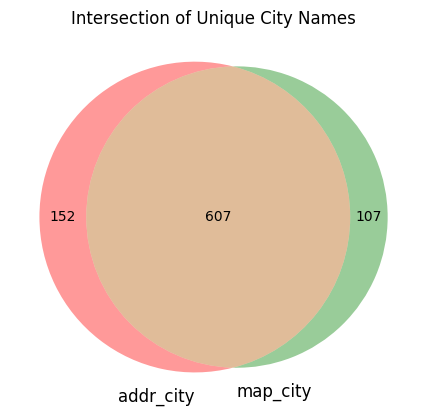

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Assuming 'merged_df' contains the merged DataFrame

# Concatenate 'addr_city' and 'map_city' columns into a single DataFrame
city_df = pd.concat([merged_df['addr_city'], merged_df['map_city']], axis=1)

# Drop rows with missing values
city_df.dropna(inplace=True)

# Get unique city names
unique_addr_city = set(city_df['addr_city'])
unique_map_city = set(city_df['map_city'])

# Create Venn diagram
venn2(subsets=[unique_addr_city, unique_map_city], set_labels=('addr_city', 'map_city'))

# Show the plot
plt.title("Intersection of Unique City Names")
plt.show()


## extract hotels

In [ ]:

# Assuming you have already read your JSON data into a DataFrame df

# Step 1: Ensure 'categories' column is properly parsed
# For example, if it's a list of lists, you can flatten it like this:
# categories_flat = [category for sublist in business_dataset['categories'] if sublist is not None for category in sublist]
categories_flat = [category.strip() for sublist in touristAttractionDataset['tourism']  if pd.notnull(sublist) for category in sublist.split(',')]

# Step 2: Count the occurrences of each category
category_counts = Counter(categories_flat)

# Step 3: Print the count of unique categories
print("Number of different types of tourism:", len(category_counts))
print("Unique categories and their counts:")

total_cnt = 0
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

for category, count in sorted_categories:
    print(f"{category}: {count}")
    total_cnt += count
print(total_cnt)

In [ ]:
set(categories_flat)

In [ ]:
hotels_keywords =['hotel', 'motel', 'guest_house', 'apartment', 'hostel', 'wilderness_hut', 'alpine_hut', 'cabin', 'resort', 'spa_resort', 'inn','airbnb']
living_accommodations = [
    'hotel',
    'motel',
    'guest_house',
    'apartment',
    'hostel',
    'inn',
    'cabin',
    'alpine_hut',
    'bed_and_breakfast',
    'resort',
    'lodge',
    'vacation_rental',
    'cabin',
    'chalet',
    'vacation_home',
    'hostel',
    'inn',
    'guest_dungeon'
]
hotels_df =  tourism_df[tourism_df['tourism'].isin(living_accommodations)]
hotels_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/5500/clean_data/Tourism/hotels.csv")

In [ ]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11303 entries, 0 to 92092
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 11303 non-null  float64
 1   Y                 11303 non-null  float64
 2   OBJECTID          11303 non-null  int64  
 3   amenity           31 non-null     object 
 4   attraction        0 non-null      object 
 5   bicycle           11303 non-null  object 
 6   board_type        0 non-null      object 
 7   building          105 non-null    object 
 8   building_levels   16 non-null     float64
 9   description       114 non-null    object 
 10  ele               128 non-null    object 
 11  historic          14 non-null     object 
 12  information       0 non-null      object 
 13  name              11303 non-null  object 
 14  name_en           175 non-null    object 
 15  name_es           8 non-null      object 
 16  opening_hours     258 non-null    object 
 17

In [ ]:
hotels_df.head(10)

,X,Y,OBJECTID,amenity,attraction,bicycle,board_type,building,building_levels,description,...,name_es,opening_hours,operator,phone,ref,source_transform,tourism,website,wheelchair,osm_id2
0,-77.436697,43.131131,1398,cafe,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,hotel,NaN,limited,10931897273
63,-87.877168,42.347792,42138713,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,hotel,NaN,limited,11599311619
240,-83.954881,36.014683,42169987,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN,limited,11612162769
266,-111.059050,45.701287,42187599,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,+1 406-577-1155,BZNCY,NaN,hotel,https://www.marriott.com/bzncy,limited,11619555959
268,-84.753365,42.244336,42191434,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,+1 517-629-8520,JXNAB,NaN,hotel,https://www.marriott.com/en-us/hotels/jxnab-co...,limited,11620270976
272,-81.567405,30.256561,42202162,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,apartment,NaN,limited,11625086069
321,-86.782943,36.159821,42207144,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,(629) 224-3959,NaN,NaN,hotel,https://www.hilton.com/en/hotels/bnapopo-tempo...,limited,11627246833
332,-90.074782,29.954140,42218520,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,hotel,NaN,limited,11631741367
335,-93.644520,41.537098,42228707,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,hotel,NaN,limited,11634517087
336,-80.150259,42.097595,42229018,NaN,NaN,unknown,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,+1 814-506-0087,PA524,NaN,hotel,https://www.choicehotels.com/pennsylvania/fair...,limited,11634500129


In [ ]:
from geopy.geocoders import Nominatim, GeoNames
geolocator = Nominatim(user_agent="app1")


location = geolocator.reverse("14.653835, -92.355947", addressdetails=True)
print(location)

Hotel Playa Linda, Camino Playa Linda-Barra de Cahuacan, Barra de Cahoacán (Las Gaviotas), Tapachula, Chiapas, México


In [ ]:
json_file = '/content/drive/MyDrive/Colab_Notebooks/5500/raw_dataset/marketing_sample_for_booking_com-hotel_booking_com__20200101_20200331.ldjson'
with open(json_file, 'r', encoding='utf-8') as f:  # read in the file
    list_of_rows = [json.loads(row) for row in f.readlines()]  # use a list comprehesion to convert each row from str to dict

# convert to a dataframe
hotels_dataset = pd.json_normalize(list_of_rows)

In [ ]:
hotels_dataset.head(5)


,uniq_id,crawl_timestamp,pageurl,name,hotel_id,area,city,address,lat,long,...,photo_count,cleanliness,facilities,location,staff,wifi,comfort,value_for_money,extra_adult_rate,extra_child_rate
0,2b6f1b6afec968b2cab3d23c8630d50e,2020-01-03 10:03:43 +0000,https://www.booking.com/hotel/in/shreyans-inn....,Shreyans Inn,1051764,"B-2/5, Safdarjung Enclave, Africa Avenue , Nea...",Delhi,"B-2/5, Safdarjung Enclave, Africa Avenue , Nea...",28.56251918,77.18886986,...,40.0,7.1,6.9,7.8,7.6,6.4,7.0,6.4,NaN,NaN
1,fe21aa6cf20e973e21d6153f53034eb9,2020-02-03 09:19:26 +0000,https://www.booking.com/hotel/in/bamboo-yoga.e...,Bamboo Yoga,1524860,"South End Patnem Beach, Patnem, Goa",Goa,"South End Patnem Beach, Patnem, Goa, 403702 Pa...",14.99687253,74.03394967,...,46.0,0.0,0.0,9.7,9.6,8.8,9.0,8.6,NaN,NaN
2,906d691dd470bfdf458b33ae2fc2e2f7,2020-03-03 08:28:24 +0000,https://www.booking.com/hotel/in/cashinuth-bea...,Kashinath Beach Huts,1656185,Agonda Beach,Goa,"Agonda Beach,, 403702 Agonda, India",15.04399495,73.98712903,...,45.0,8.0,7.4,0.0,9.1,NaN,8.0,8.2,NaN,NaN
3,e01fad7c6ed5ab5887282fbe1978ee66,2020-02-03 12:30:46 +0000,https://www.booking.com/hotel/in/kites-stay.en...,Kites Stay,4410242,"Kites Stay, Mangal Complex, Kumaran Street Opp...",Chennai,"Kites Stay, Mangal Complex, Kumaran Street Opp...",12.93672200,80.12788500,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e9b4c2a562503a7ff284588303193174,2020-02-03 09:22:43 +0000,https://www.booking.com/hotel/in/p3-beach-inn....,P3 Beach inn,5913082,Titos Lane,Goa,"Titos Lane, 403516 Baga, India",15.55652900,73.75403700,...,27.0,0.0,0.0,0.0,6.7,NaN,0.0,6.7,NaN,NaN


In [ ]:
hotels_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uniq_id            975 non-null    object 
 1   crawl_timestamp    975 non-null    object 
 2   pageurl            975 non-null    object 
 3   name               975 non-null    object 
 4   hotel_id           975 non-null    object 
 5   area               973 non-null    object 
 6   city               975 non-null    object 
 7   address            975 non-null    object 
 8   lat                975 non-null    object 
 9   long               975 non-null    object 
 10  amenities          975 non-null    object 
 11  hotel_star_rating  645 non-null    object 
 12  hotel_type         964 non-null    object 
 13  review_count       655 non-null    object 
 14  average_rating     480 non-null    float64
 15  photo_count        834 non-null    float64
 16  cleanliness        479 non

In [ ]:
location = geolocator.reverse("12.9367220, 80.12788500", addressdetails=True)
print(location)

Grand Southern Trunk Road, East Tambaram, Tambaram, Chengalpattu District, Tamil Nadu, 600059, India
